In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import torchvision, torch

In [4]:
import sys, os
sys.path.insert(0,"../torchxrayvision/")
import torchxrayvision as xrv
import matplotlib.pyplot as plt
import torch
from torch.nn import functional as F
import glob
import numpy as np
import skimage, skimage.filters
%matplotlib inline
import captum, captum.attr
import torch, torch.nn
import pickle
import attribution
import pandas as pd
import datasets
import shutil
import json
import glob

In [5]:
dmerge = datasets.get_data("nih")

NIH_Dataset num_samples=67310 views=['PA'] data_aug=None


In [6]:
dmerge

{'Atelectasis': {0.0: 61582, 1.0: 5728},
 'Cardiomegaly': {0.0: 65747, 1.0: 1563},
 'Consolidation': {0.0: 65789, 1.0: 1521},
 'Edema': {0.0: 67034, 1.0: 276},
 'Effusion': {0.0: 60721, 1.0: 6589},
 'Emphysema': {0.0: 65811, 1.0: 1499},
 'Fibrosis': {0.0: 65902, 1.0: 1408},
 'Hernia': {0.0: 67118, 1.0: 192},
 'Infiltration': {0.0: 57957, 1.0: 9353},
 'Mass': {0.0: 63743, 1.0: 3567},
 'Nodule': {0.0: 63133, 1.0: 4177},
 'Pleural_Thickening': {0.0: 64892, 1.0: 2418},
 'Pneumonia': {0.0: 66680, 1.0: 630},
 'Pneumothorax': {0.0: 63903, 1.0: 3407}}


NIH_Dataset num_samples=67310 views=['PA'] data_aug=None

In [7]:
ae = xrv.autoencoders.ResNetAE(weights="101-elastic").cuda()

In [8]:
models = [xrv.models.DenseNet(weights="all").cuda(),
          xrv.baseline_models.jfhealthcare.DenseNet().cuda()]

In [9]:
model = models[0]
print(model.pathologies)
print(model)

['Atelectasis', 'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pneumonia', 'Pleural_Thickening', 'Cardiomegaly', 'Nodule', 'Mass', 'Hernia', 'Lung Lesion', 'Fracture', 'Lung Opacity', 'Enlarged Cardiomediastinum']
XRV-DenseNet121-all


In [10]:
for_eval = [
            "Cardiomegaly",
            "Atelectasis",
            "Effusion",
            "Consolidation",
            "Edema",
            "Mass"
            ]

In [11]:
model.pathologies

['Atelectasis',
 'Consolidation',
 'Infiltration',
 'Pneumothorax',
 'Edema',
 'Emphysema',
 'Fibrosis',
 'Effusion',
 'Pneumonia',
 'Pleural_Thickening',
 'Cardiomegaly',
 'Nodule',
 'Mass',
 'Hernia',
 'Lung Lesion',
 'Fracture',
 'Lung Opacity',
 'Enlarged Cardiomediastinum']

In [12]:
for_eval

['Cardiomegaly', 'Atelectasis', 'Effusion', 'Consolidation', 'Edema', 'Mass']

In [13]:
methods = ["image", "grad", "guided", "integrated", "latentshift-mean"]
temp_path = "/lscratch/joecohen/SDS-2342-ASDAA"

tensor([0.5100])
[0.44826764] -50 1


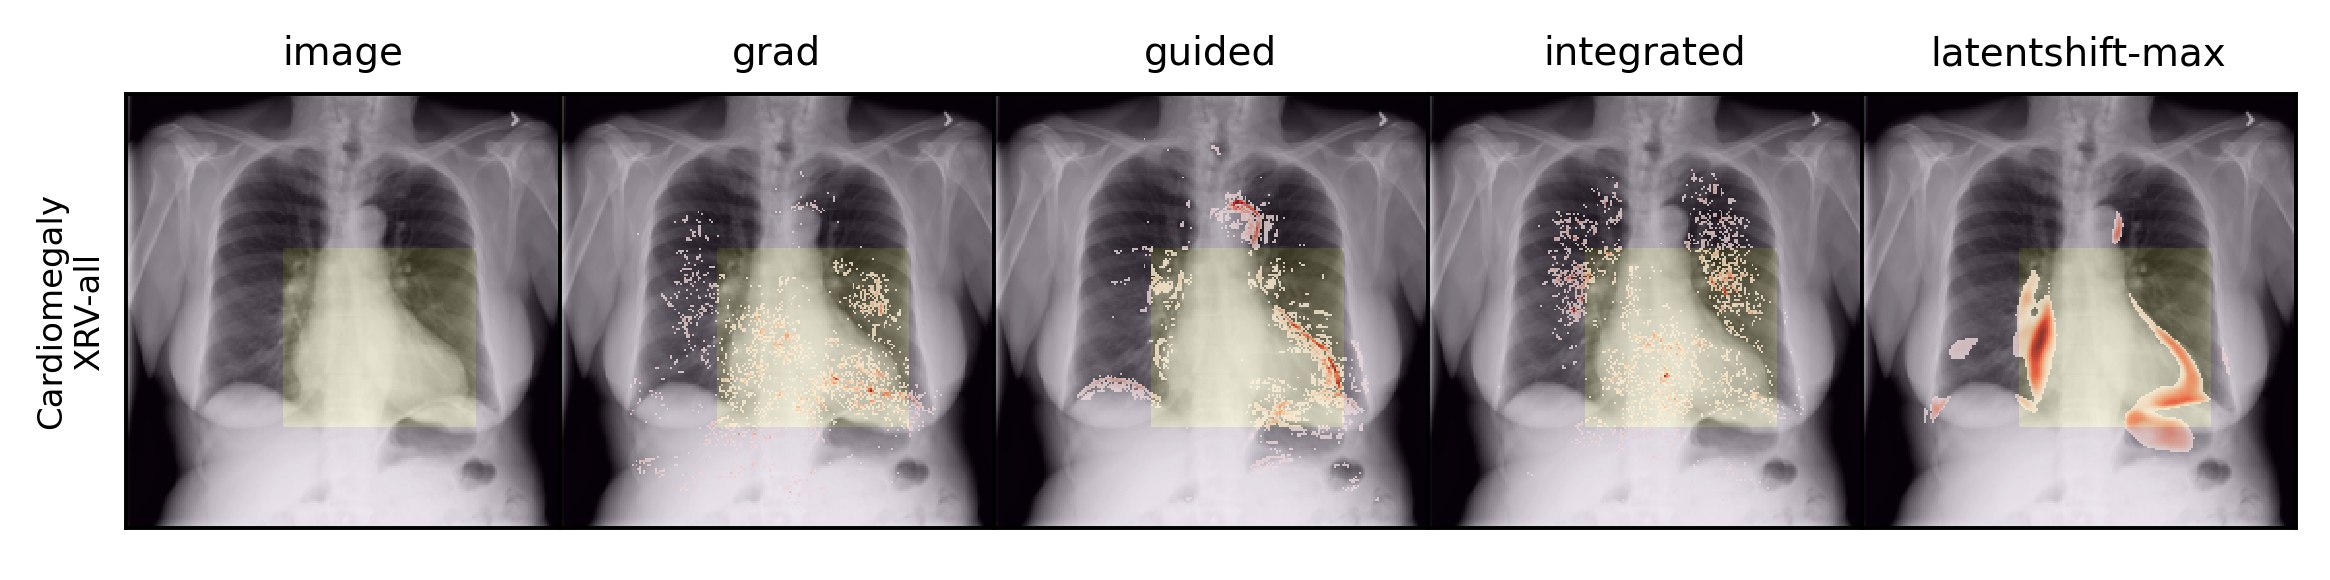

In [13]:
target = "Cardiomegaly"
label = 1
dwhere = np.where(dmerge.csv.has_masks & (dmerge.labels[:,dmerge.pathologies.index(target)]  == 1))[0]
idx = 5
sample = dmerge[dwhere[idx]]
model = models[0]
attribution.generate_attributions(sample, model, target, ae, temp_path, dmerge, plot_iou=False)

tensor([0.7834])
[0.47765264] -120 6


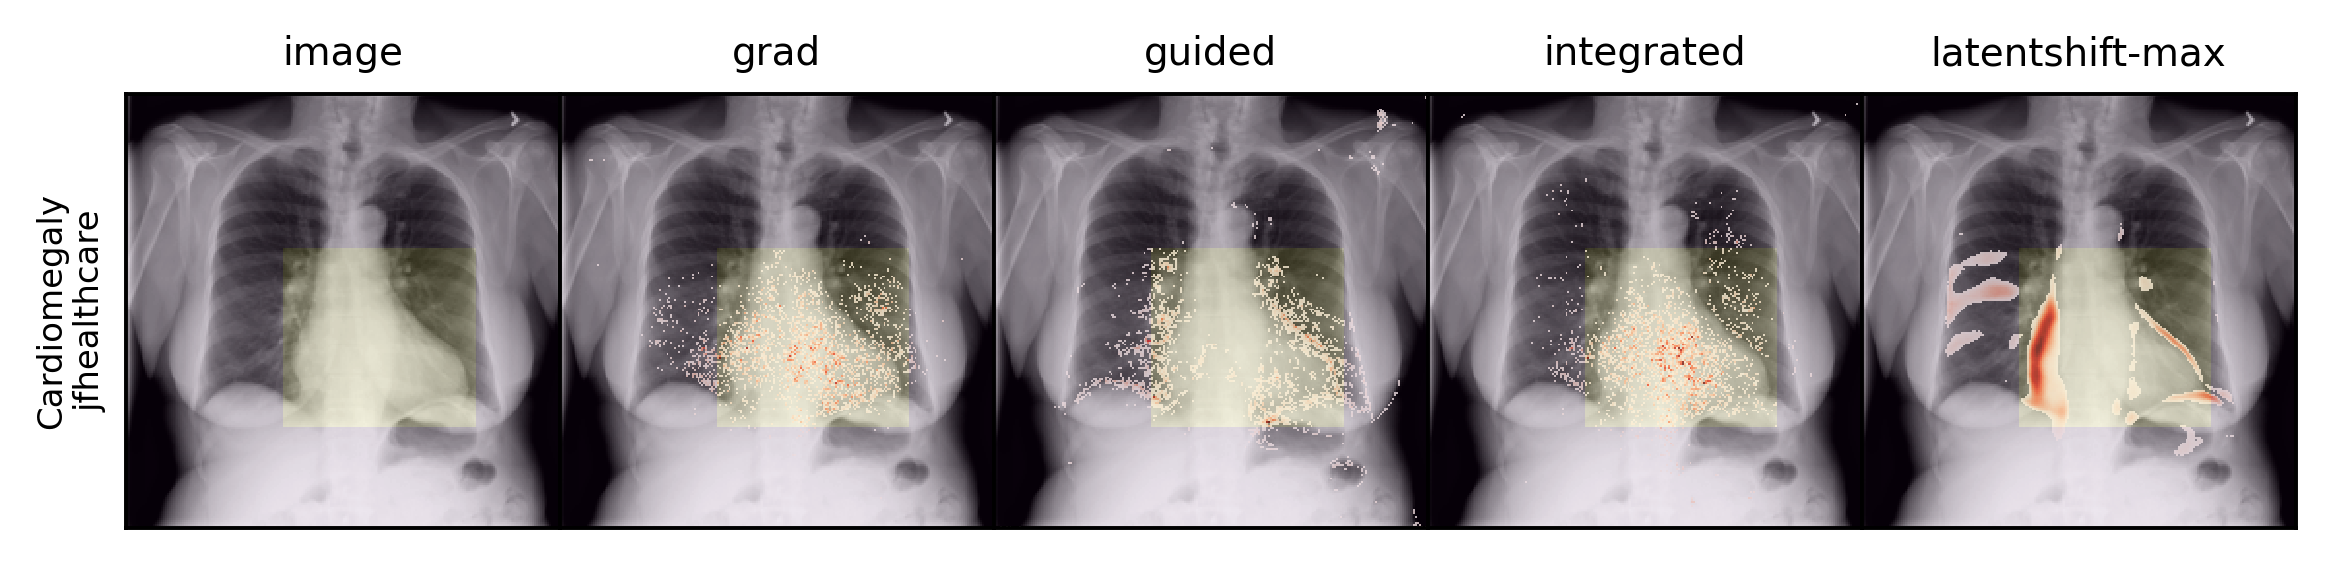

In [14]:
target = "Cardiomegaly"
label = 1
dwhere = np.where(dmerge.csv.has_masks & (dmerge.labels[:,dmerge.pathologies.index(target)]  == 1))[0]
idx = 5
sample = dmerge[dwhere[idx]]
model = models[1]
attribution.generate_attributions(sample, model, target, ae, temp_path, dmerge, plot_iou=False)

tensor([0.8052])
[0.5680183] -70 4


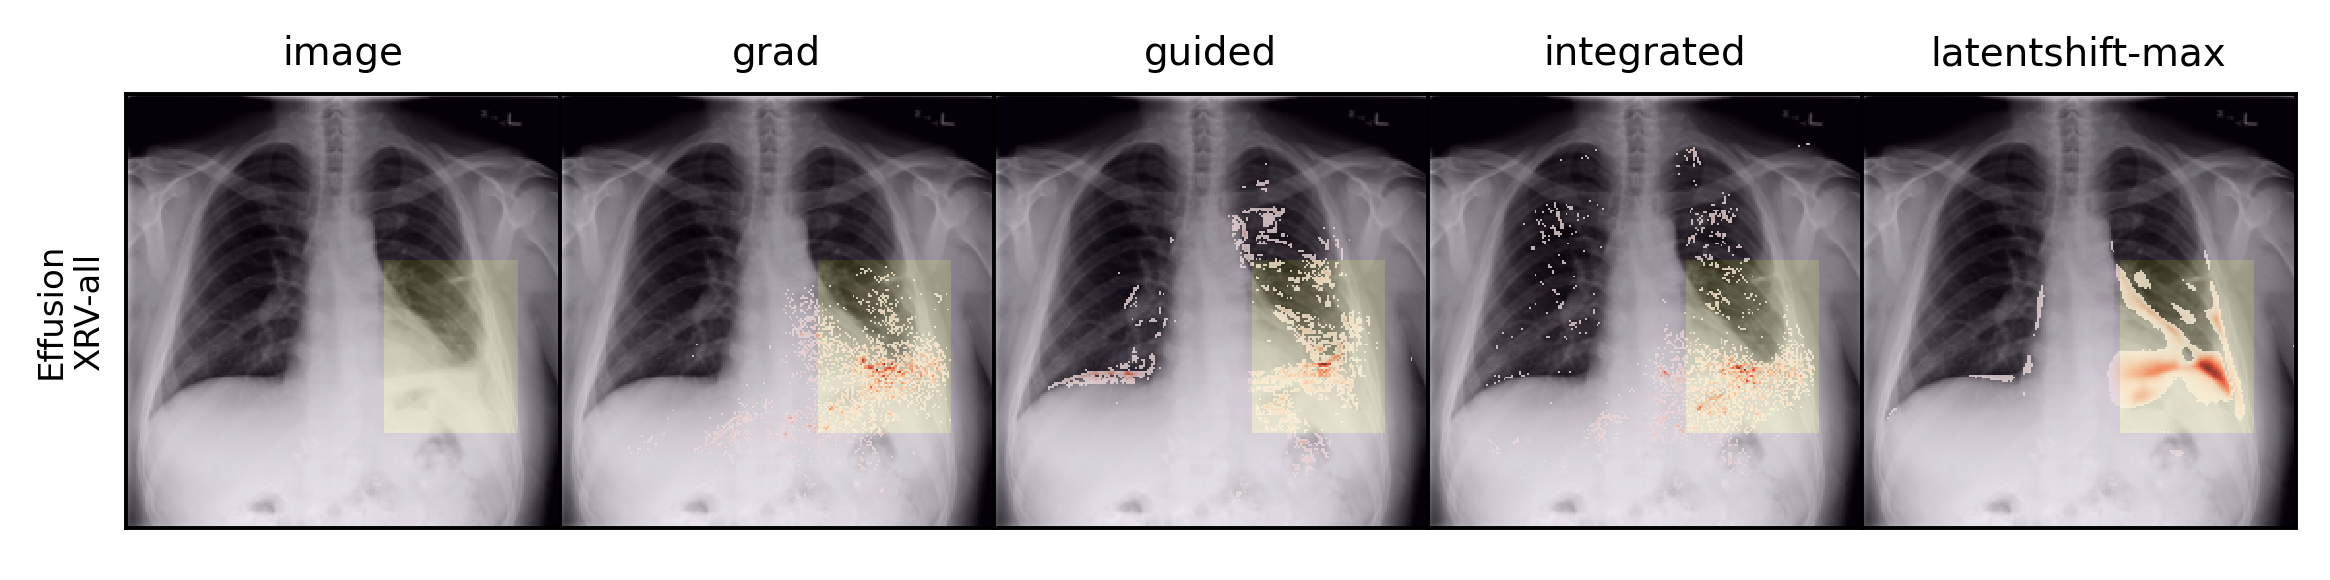

In [15]:
target = "Effusion"
label = 1
dwhere = np.where(dmerge.csv.has_masks & (dmerge.labels[:,dmerge.pathologies.index(target)]  == 1))[0]
idx = 8
sample = dmerge[dwhere[idx]]
model = models[0]
attribution.generate_attributions(sample, model, target, ae, temp_path, dmerge,plot_iou=False)

tensor([0.8102])
[0.40092975] -50 2


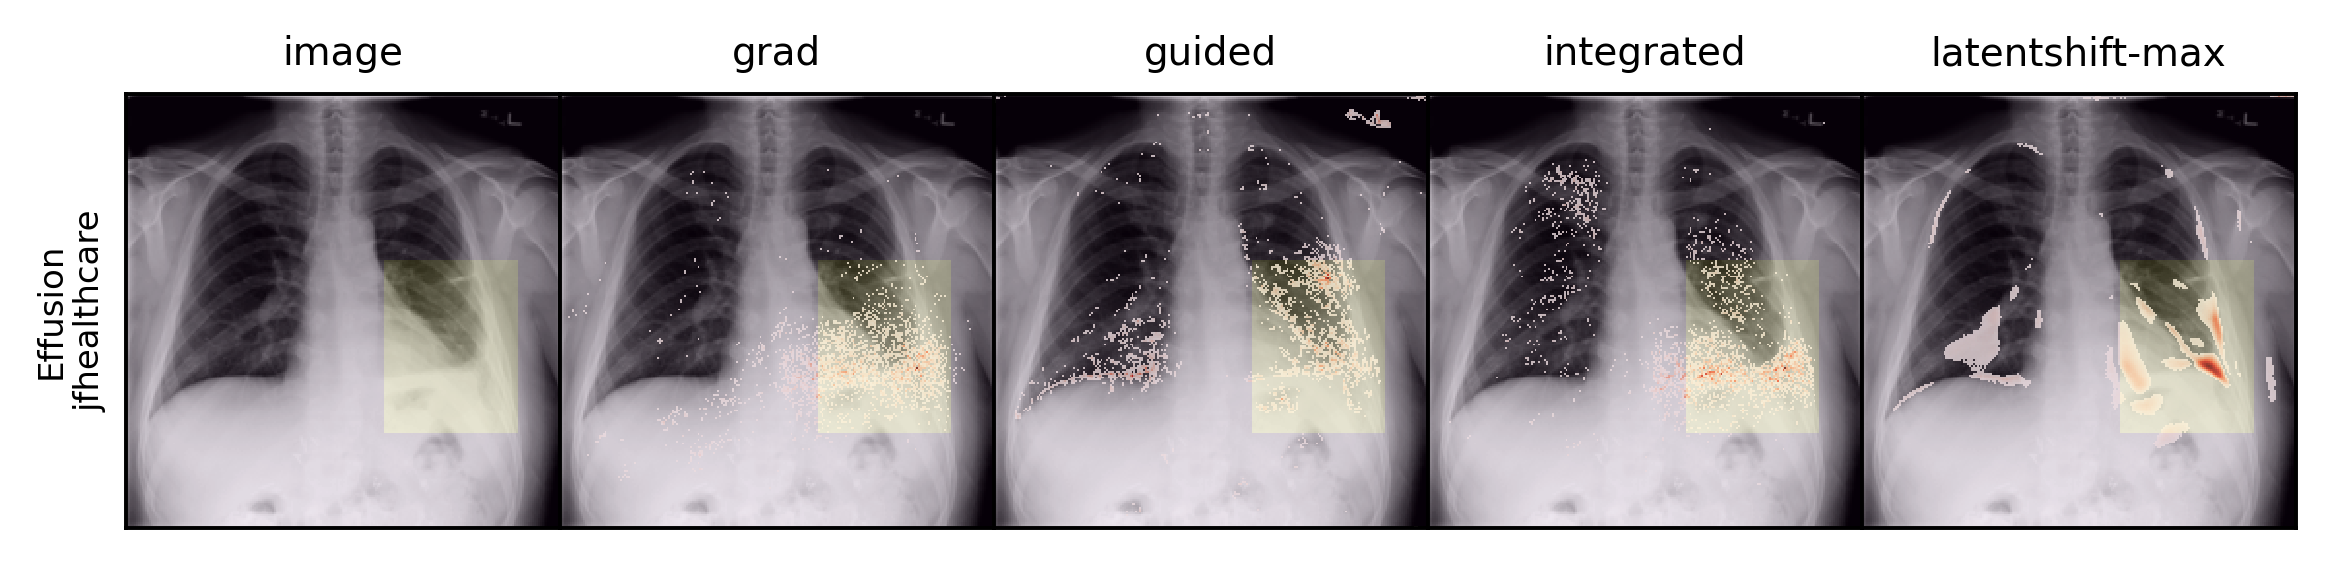

In [16]:
target = "Effusion"
label = 1
dwhere = np.where(dmerge.csv.has_masks & (dmerge.labels[:,dmerge.pathologies.index(target)]  == 1))[0]
idx = 8
sample = dmerge[dwhere[idx]]
model = models[1]
attribution.generate_attributions(sample, model, target, ae, temp_path, dmerge,plot_iou=False)

tensor([0.5100])
grad {'iou': 0.17595101876944697, 'precision': 0.698684734954165, 'recall': 0.19039860975344847}
guided {'iou': 0.14090953354757035, 'precision': 0.5767237943403747, 'recall': 0.15716302813077007}
integrated {'iou': 0.15588003157063932, 'precision': 0.629732961339179, 'recall': 0.1716085587053329}
[0.44826764] -50 1
latentshift-max {'iou': 0.1871516871010234, 'precision': 0.7361498605021921, 'recall': 0.2006082328662974}


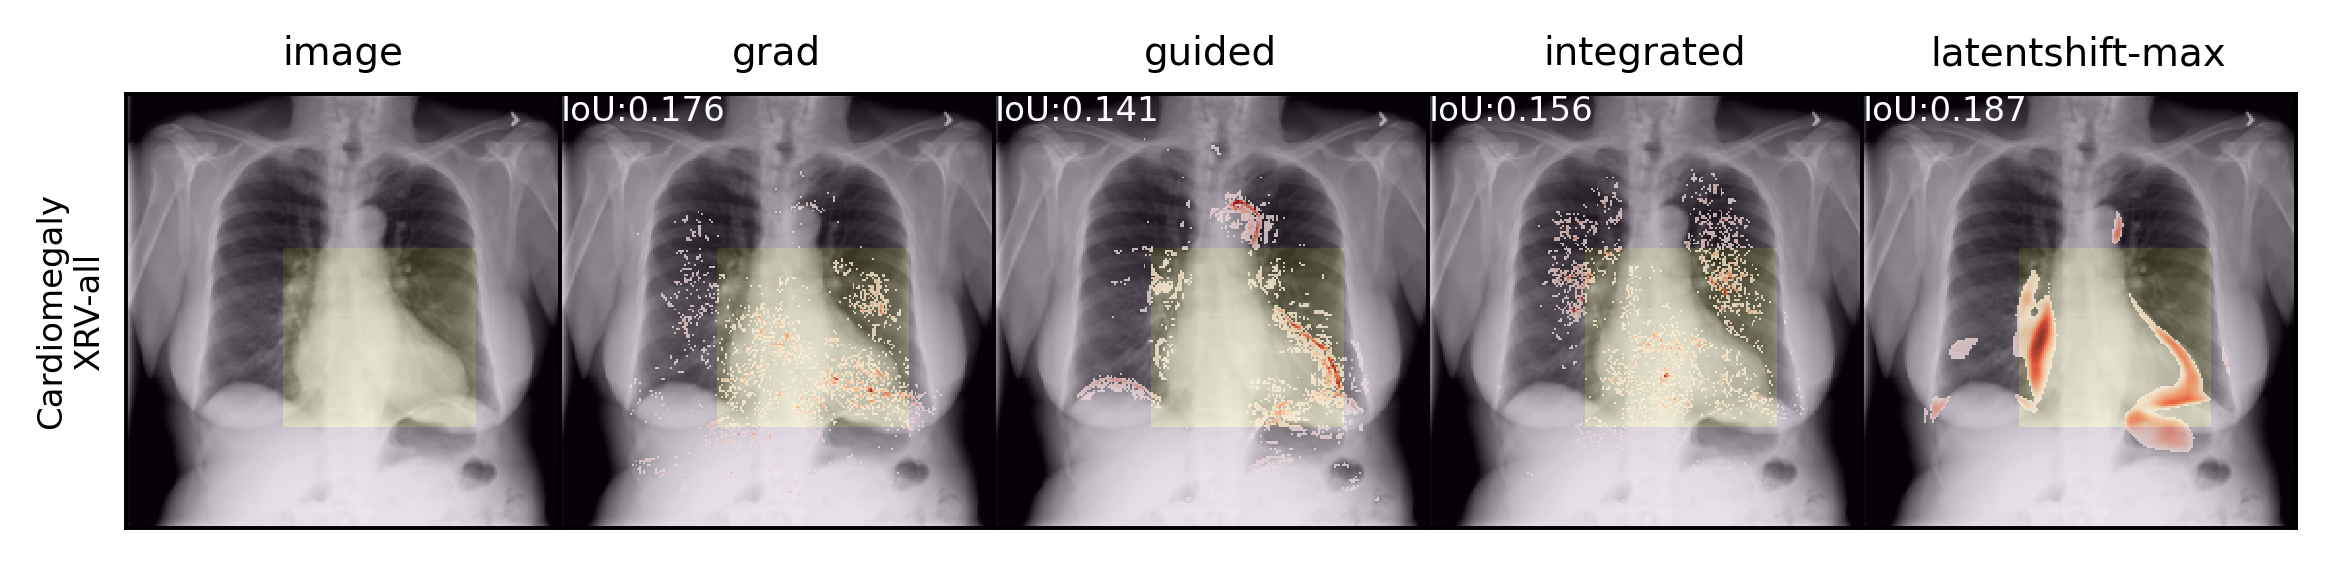

In [16]:
target = "Cardiomegaly"
label = 1
dwhere = np.where(dmerge.csv.has_masks & (dmerge.labels[:,dmerge.pathologies.index(target)]  == 1))[0]
idx = 5
sample = dmerge[dwhere[idx]]
model = models[0]
attribution.generate_attributions(sample, model, target, ae, temp_path, dmerge, plot_iou=True, threshold=95)

tensor([0.7834])
grad {'iou': 0.23067226890756304, 'precision': 0.8752491032283778, 'recall': 0.23851417399804498}
guided {'iou': 0.17547908096719173, 'precision': 0.6970904742925468, 'recall': 0.18996415770609318}
integrated {'iou': 0.23054301018800546, 'precision': 0.8748505380629733, 'recall': 0.23840556098620616}
[0.47765264] -120 6
latentshift-max {'iou': 0.15485460818137015, 'precision': 0.6261458748505381, 'recall': 0.17063104159878353}


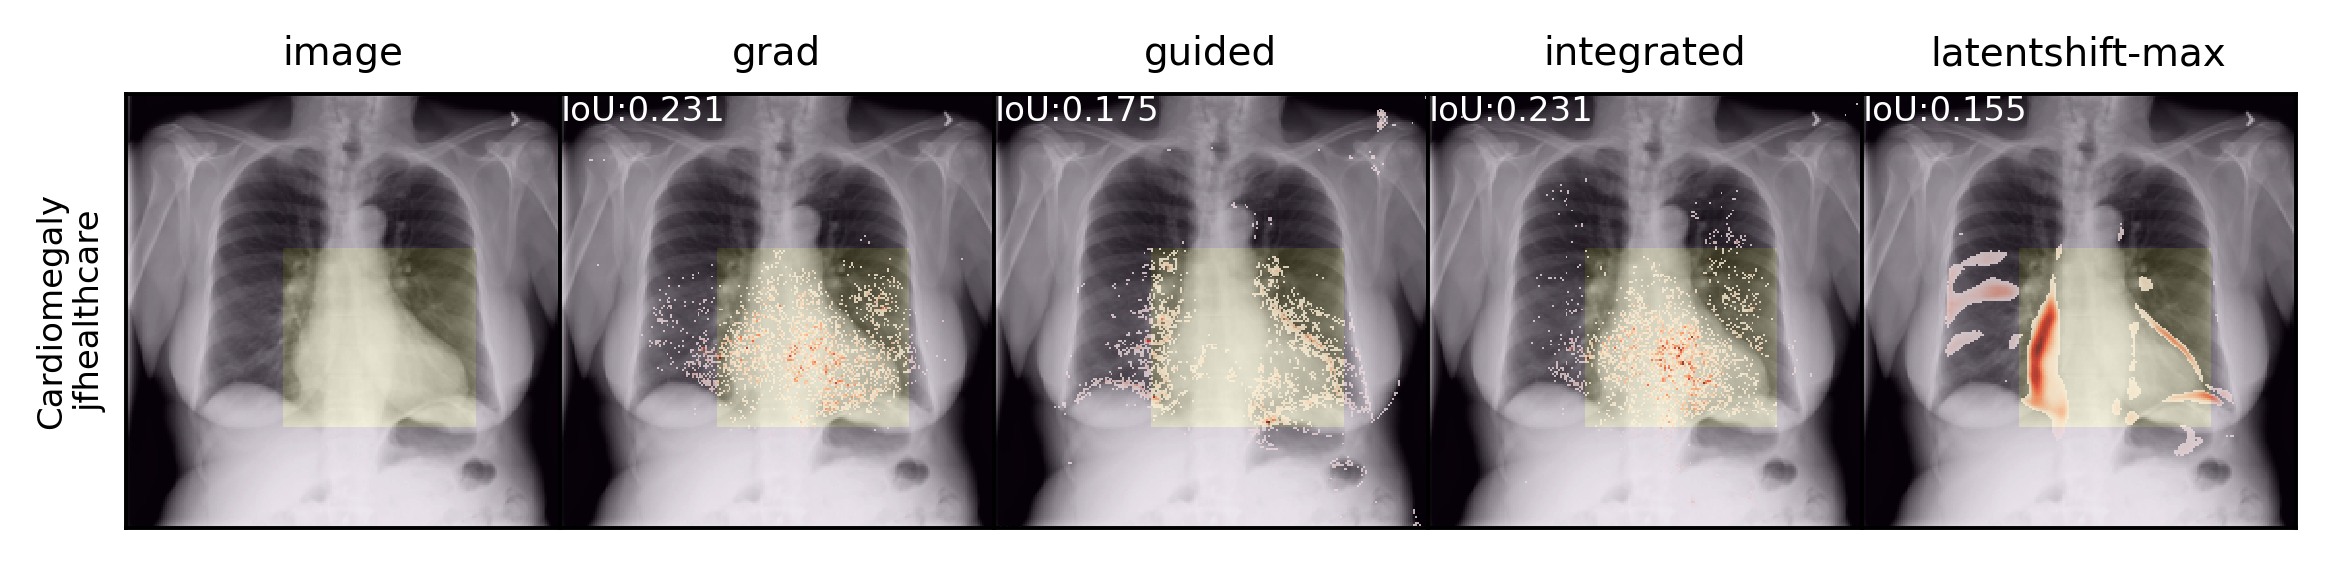

In [17]:
target = "Cardiomegaly"
label = 1
dwhere = np.where(dmerge.csv.has_masks & (dmerge.labels[:,dmerge.pathologies.index(target)]  == 1))[0]
idx = 5
sample = dmerge[dwhere[idx]]
model = models[1]
attribution.generate_attributions(sample, model, target, ae, temp_path, dmerge, plot_iou=True, threshold=95)

tensor([0.8052])
grad {'iou': 0.36633663366336633, 'precision': 0.5362318840579711, 'recall': 0.5362318840579711}
guided {'iou': 0.33319021039072566, 'precision': 0.4998389694041868, 'recall': 0.4998389694041868}
integrated {'iou': 0.27790924992283156, 'precision': 0.4349436392914654, 'recall': 0.4349436392914654}
[0.5680183] -70 4
latentshift-max {'iou': 0.40736543909348444, 'precision': 0.5789049919484702, 'recall': 0.5789049919484702}


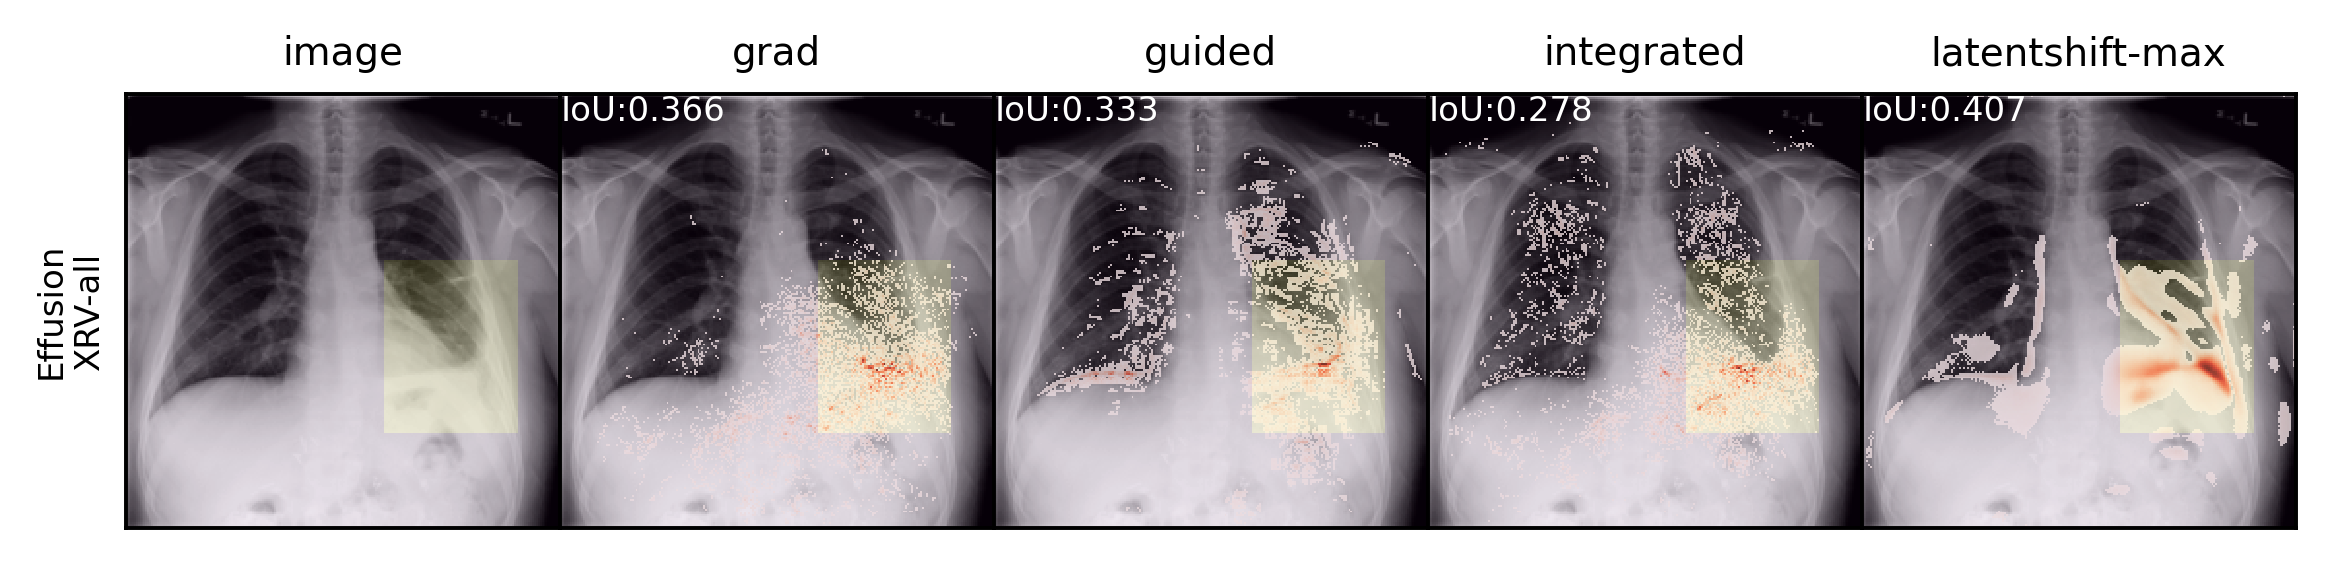

In [19]:
target = "Effusion"
label = 1
dwhere = np.where(dmerge.csv.has_masks & (dmerge.labels[:,dmerge.pathologies.index(target)]  == 1))[0]
idx = 8
sample = dmerge[dwhere[idx]]
model = models[0]
attribution.generate_attributions(sample, model, target, ae, temp_path, dmerge,plot_iou=True)

tensor([0.8102])
grad {'iou': 0.3485342019543974, 'precision': 0.5169082125603864, 'recall': 0.5169082125603864}
guided {'iou': 0.2777777777777778, 'precision': 0.43478260869565216, 'recall': 0.43478260869565216}
integrated {'iou': 0.29875562062114397, 'precision': 0.4600644122383253, 'recall': 0.4600644122383253}
[0.40092975] -50 2
latentshift-max {'iou': 0.24748895138609883, 'precision': 0.3967793880837359, 'recall': 0.3967793880837359}


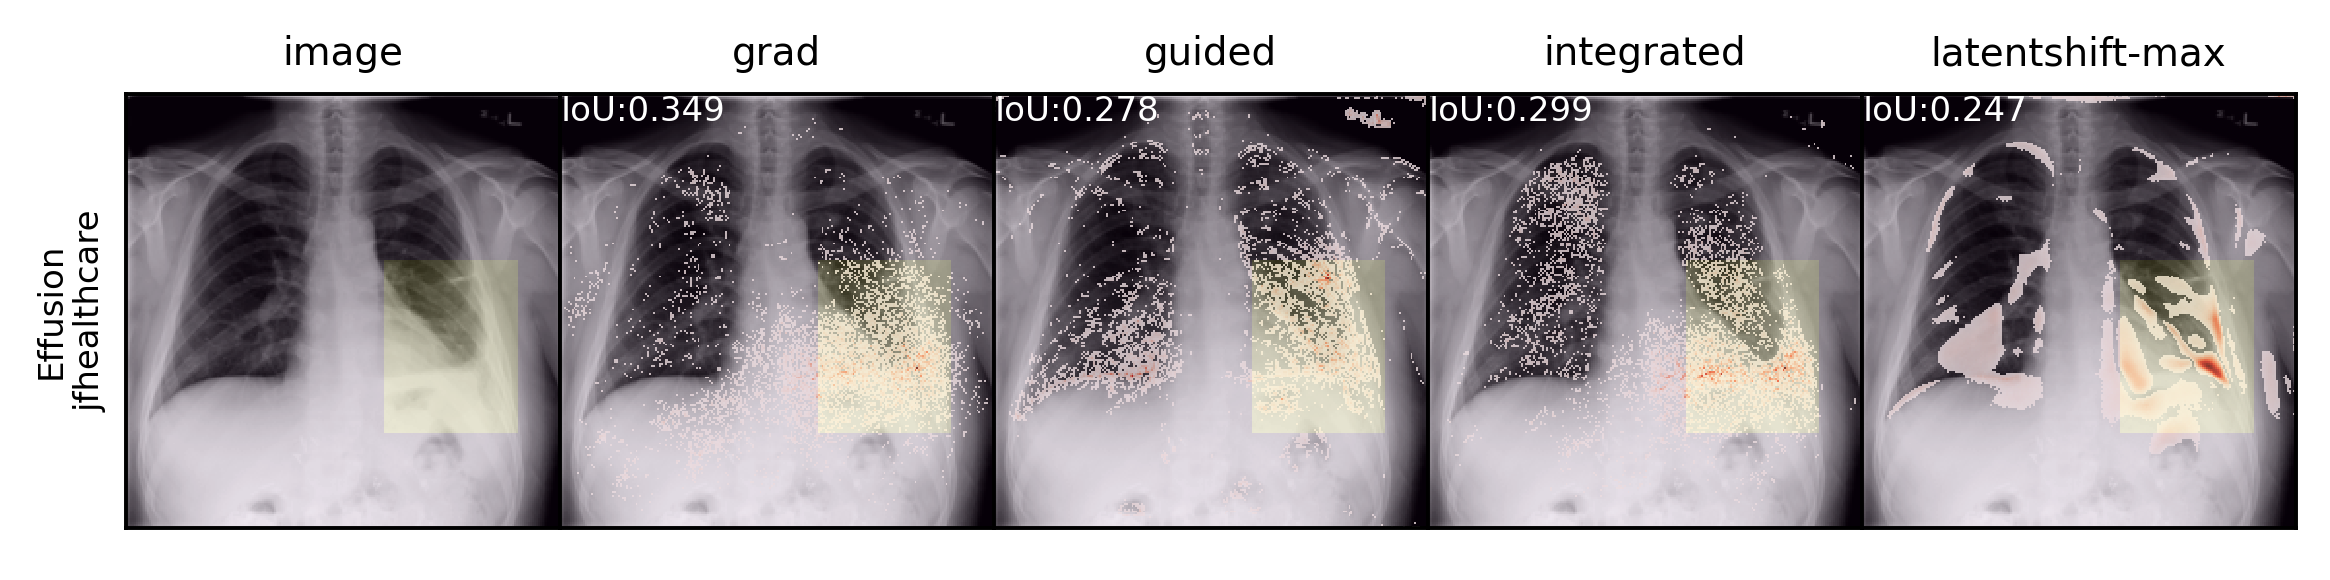

In [20]:
target = "Effusion"
label = 1
dwhere = np.where(dmerge.csv.has_masks & (dmerge.labels[:,dmerge.pathologies.index(target)]  == 1))[0]
idx = 8
sample = dmerge[dwhere[idx]]
model = models[1]
attribution.generate_attributions(sample, model, target, ae, temp_path, dmerge,plot_iou=True)

tensor([0.8052])
[0.5680183] -70 4
latentshift-max {'iou': 0.40736543909348444, 'precision': 0.5789049919484702, 'recall': 0.5789049919484702}
[0.5680183] -70 4
latentshift-mean {'iou': 0.40736543909348444, 'precision': 0.5789049919484702, 'recall': 0.5789049919484702}
[0.5680183] -70 4
latentshift-mm {'iou': 0.4068871771635705, 'precision': 0.5784219001610306, 'recall': 0.5784219001610306}
[0.5680183] -70 4
latentshift-int {'iou': 0.4233325693330277, 'precision': 0.5948470209339775, 'recall': 0.5948470209339775}


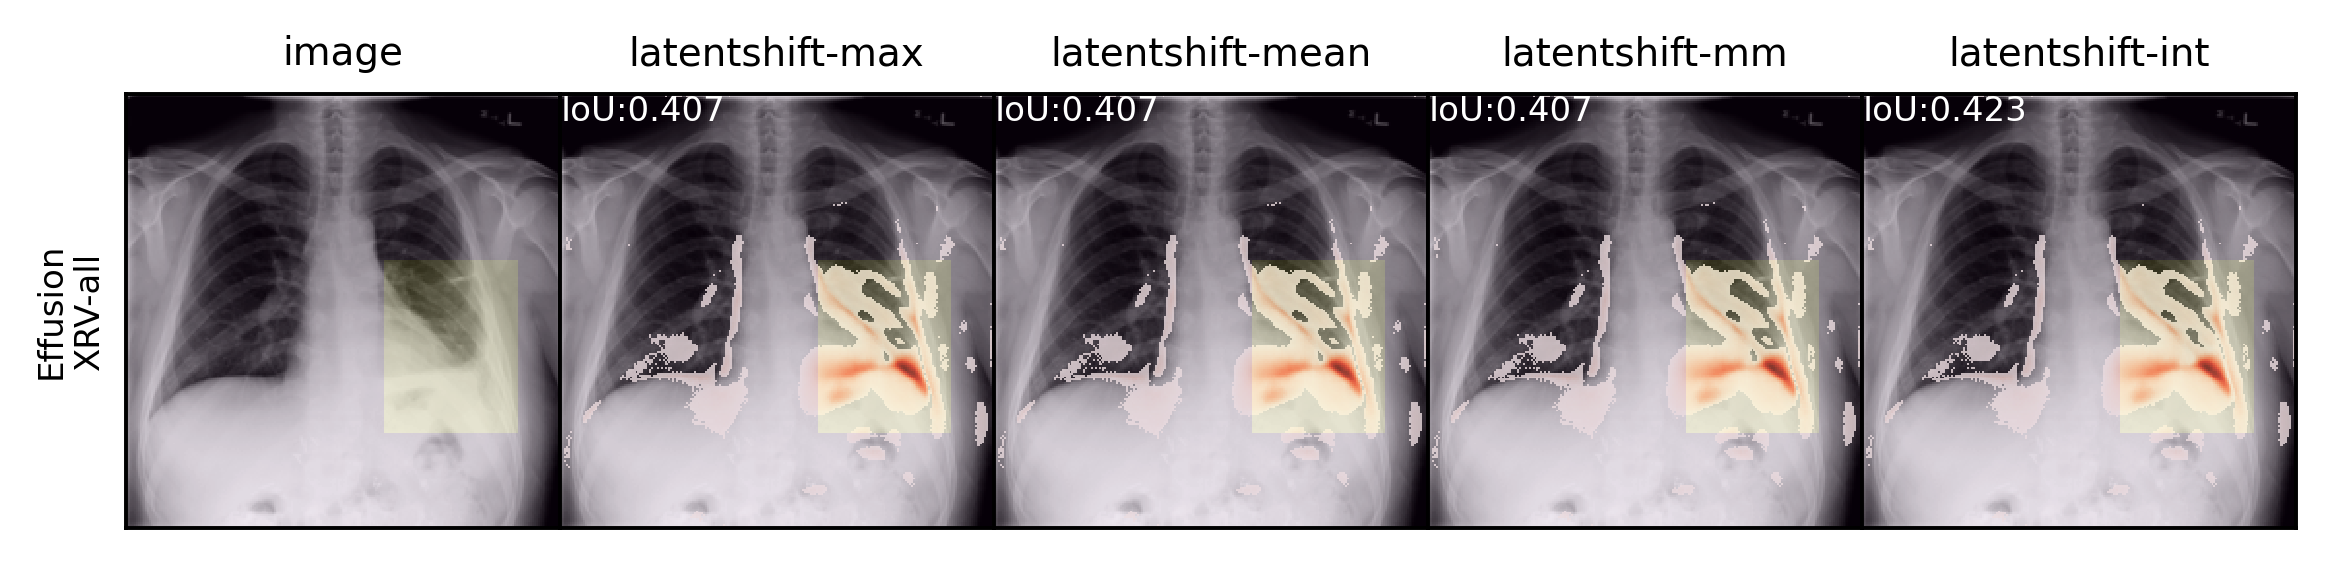

In [21]:
methods = ["image", "latentshift-max", "latentshift-mean", "latentshift-mm", "latentshift-int"]
temp_path = "/lscratch/joecohen/SDS-2342-ASDAA"

target = "Effusion"
label = 1
dwhere = np.where(dmerge.csv.has_masks & (dmerge.labels[:,dmerge.pathologies.index(target)]  == 1))[0]
idx = 8
sample = dmerge[dwhere[idx]]
model = models[0]
attribution.generate_attributions(sample, model, target, ae, temp_path, dmerge, plot_iou=True, methods=methods)